In [5]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

# **1) Crear una figura 2D con puntos o formas**

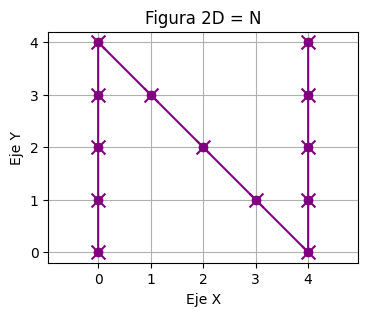

In [6]:
# Asignar manualmente los puntos en X y Y
x = [0, 0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4, 4]
y = [0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4]

plt.figure(figsize=(4, 3))
plt.scatter(x, y, color='purple', marker='x', s=100)  # 's' es el tamaño del punto
plt.title("Figura 2D = N")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid(True)
plt.axis("equal")

plt.plot(x, y, color='purple', marker='o', linestyle='-')
plt.show()


# **2) Aplicar traslación, rotación y escala usando matrices de transformación**

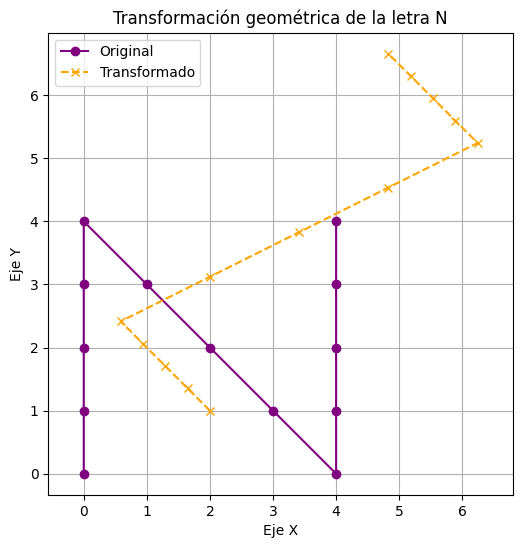

In [7]:
# Puntos originales
x = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4, 4])
y = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4])

# Convertir a coordenadas homogéneas (cada punto es una fila)
puntos = np.vstack((x, y, np.ones_like(x)))  # matriz 3xN

# Crear matrices de transformación

# a. Traslación (dx=2, dy=1) mueve los puntos 2 unidades en X y 1 unidad en y
T = np.array([
    [1, 0, 2],
    [0, 1, 1],
    [0, 0, 1]
])

# b. Rotación (ángulo en radianes)
theta = np.radians(45)  # 45 grados
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])

# c. Escalado (sx=1.5, sy=0.5) En X se estira 1.5 veces y en y se achica a la mitad
S = np.array([
    [1.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

# Aplicar transformaciones (en orden: escalar, luego rotar, luego trasladar)
transformacion_total = T @ R @ S  # Multiplicación de matrices

# Aplicar transformación
puntos_transformados = transformacion_total @ puntos

# Graficar original y transformado
plt.figure(figsize=(6, 6))
plt.plot(puntos[0], puntos[1], 'o-', color='purple', label='Original') #Original
plt.plot(puntos_transformados[0], puntos_transformados[1], 'x--', color='orange', label='Transformado') #Transformado

plt.title("Transformación geométrica de la letra N")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.show()


# **3) Generar una animación (usando bucles o interpolación) en funcion del frame**

---



In [25]:

from matplotlib.animation import FuncAnimation

# Puntos originales
x = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4, 4])
y = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4])

# Coordenadas homogéneas
puntos = np.vstack((x, y, np.ones_like(x)))  # 3xN

# Matrices de transformación
T = np.array([
    [1, 0, 2],
    [0, 1, 1],
    [0, 0, 1]])

theta = np.radians(45)

R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]])

S = np.array([
    [1.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]])

# Transformación completa
transformacion_total = T @ R @ S

# Crear figura
fig, ax = plt.subplots(figsize=(6, 6))
line_orig, = ax.plot(puntos[0], puntos[1], 'o-', color='purple', label='Original')
line_trans, = ax.plot([], [], 'x--', color='orange', label='Transformado')

ax.set_xlim(-5, 10)
ax.set_ylim(-5, 10)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Animación de transformación geométrica")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.legend()

# Número de cuadros (frames)
num_frames = 60

# Función de interpolación entre la matriz identidad y la transformación total
def interpolar_matriz(alpha):
    # Interpolación lineal entre identidad y transformación total
    return (1 - alpha) * np.eye(3) + alpha * transformacion_total

# Función de actualización para la animación
def actualizar(frame):
    alpha = frame / (num_frames - 1)
    M = interpolar_matriz(alpha)
    puntos_interp = M @ puntos
    line_trans.set_data(puntos_interp[0], puntos_interp[1])
    return line_trans,

# Crear animación
ani = FuncAnimation(fig, actualizar, frames=num_frames, interval=50, blit=True)
plt.close(fig)  # Evito que salgan dos graficos (el estatico de fig)

# Mostrar animación en Colab
from IPython.display import HTML
HTML(ani.to_jshtml())

# **4) Exportar como GIF animado con imageio**


In [28]:
import imageio.v2 as imageio  # usamos v2 para evitar warnings
import os

# Crear carpeta temporal para los frames
os.makedirs("frames", exist_ok=True)
filenames = []

# Generar cada frame como imagen
for frame in range(num_frames):
    alpha = frame / (num_frames - 1)
    M = interpolar_matriz(alpha)
    puntos_interp = M @ puntos

    fig, ax = plt.subplots(figsize=(6, 6))
    line_orig, = ax.plot(puntos[0], puntos[1], 'o-', color='purple', label='Original')
    ax.plot(puntos_interp[0], puntos_interp[1], 'x--', color='orange', label='Transformado')
    ax.set_xlim(-5, 10)
    ax.set_ylim(-5, 10)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title(f"t = {alpha:.2f}")
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.legend()

    filename = f"frames/frame_{frame:03d}.png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close(fig)

# Crear el GIF
with imageio.get_writer("transformacion.gif", mode='I', duration=0.05) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Limpiar (opcional)
for filename in filenames:
    os.remove(filename)
os.rmdir("frames")

# Mostrar en notebook
from IPython.display import Image
Image(filename="transformacion.gif")

# Descargar a tu equipo
from google.colab import files
files.download("transformacion.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>